# 6.3 실습 - 인공신경망 학습
## 6.3.2 성능 개선

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

# 데이터 불러오기
boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
boston_df.shape

(506, 14)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터분할
y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 실행
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 1013.5778 - mse: 1013.5778
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 154.5176 - mse: 154.5176
Epoch 3/50
38/38 [==============================] - 0s 3ms/step - loss: 115.3960 - mse: 115.3960
Epoch 4/50
38/38 [==============================] - 0s 3ms/step - loss: 103.4926 - mse: 103.4926
Epoch 5/50
38/38 [==============================] - 0s 3ms/step - loss: 99.4216 - mse: 99.4216
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 95.9908 - mse: 95.9908
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 91.4611 - mse: 91.4611
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 87.4810 - mse: 87.4810
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 84.3610 - mse: 84.3610
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 80.8846 - mse: 80.8846
Epoch 11/50
38/38 [====================

In [5]:
y_pred = model.predict(X_test)
y_pred[0]

array([28.834036], dtype=float32)

In [6]:
y_test[0]

24.0

In [7]:
y_test.shape

(127,)

In [8]:
y_pred = np.reshape(y_pred,(127,))

In [9]:
result = pd.DataFrame({'y': y_test.values, 
                       'y_pred': y_pred, 
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
96,50.0,21.800812,28.199188
79,7.0,22.755651,15.755651
2,13.6,26.011938,12.411938
97,17.9,6.131989,11.768011
18,50.0,39.575493,10.424507
...,...,...,...
61,35.4,35.782288,0.382288
10,21.5,21.165255,0.334745
47,24.2,24.056839,0.143161
22,12.7,12.787456,0.087456


In [10]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 40])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [11]:
history = model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

In [12]:
history.history

{'loss': [32.36033630371094,
  32.6142463684082,
  32.18383026123047,
  32.576133728027344,
  32.304649353027344,
  31.843250274658203,
  31.6039981842041,
  32.06815719604492,
  31.37917137145996,
  32.26557540893555,
  32.17605209350586,
  31.207881927490234,
  31.464038848876953,
  32.174652099609375,
  31.146133422851562,
  31.01700782775879,
  30.724796295166016,
  30.929182052612305,
  31.484161376953125,
  30.95803451538086,
  31.795501708984375,
  31.61672019958496,
  31.136266708374023,
  30.68320655822754,
  31.432809829711914,
  30.58598518371582,
  30.228235244750977,
  30.24622344970703,
  30.8671932220459,
  31.162456512451172,
  29.728851318359375,
  30.048622131347656,
  29.801183700561523,
  29.780101776123047,
  30.611196517944336,
  30.426734924316406,
  29.570480346679688,
  29.86090660095215,
  29.355974197387695,
  30.619686126708984,
  29.57004737854004,
  29.553804397583008,
  29.051406860351562,
  29.644224166870117,
  29.132339477539062,
  29.188112258911133,


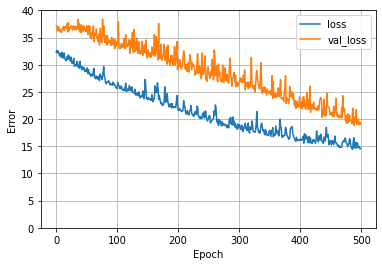

In [13]:
plot_loss(history)

In [14]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16, activation='relu'))
normalized_model.add(Dense(1, activation='relu'))

normalized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268
Trainable params: 241
Non-trainable params: 27
_________________________________________________________________


In [15]:
normalized_model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

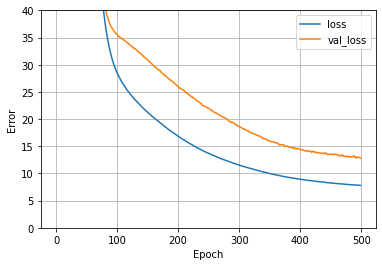

In [16]:
plot_loss(normalized_history)

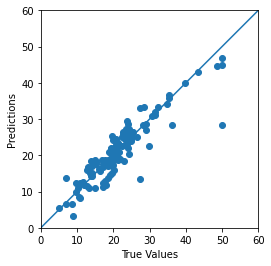

In [17]:
y_pred = normalized_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [18]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': y_test.values - y_pred, 'diff(abs)': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff(abs)'], ascending=False)

,y,y_pred,diff,diff(abs)
96,50.0,28.426611,21.573389,21.573389
111,27.5,13.395077,14.104923,14.104923
113,36.2,28.256210,7.943790,7.943790
15,29.8,22.575962,7.224038,7.224038
79,7.0,13.714753,-6.714753,6.714753
...,...,...,...,...
14,18.5,18.573532,-0.073532,0.073532
4,16.1,16.155657,-0.055657,0.055657
41,28.2,28.240065,-0.040065,0.040065
68,30.8,30.819311,-0.019311,0.019311


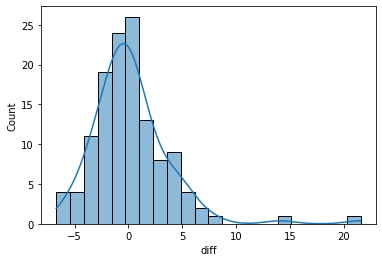

In [19]:
sns.histplot(data=result['diff'], kde = True)